<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/JDRath/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install required libraries
!pip install astropy scikit-learn tensorflow matplotlib numpy photutils auto-stretch astroquery ipytest

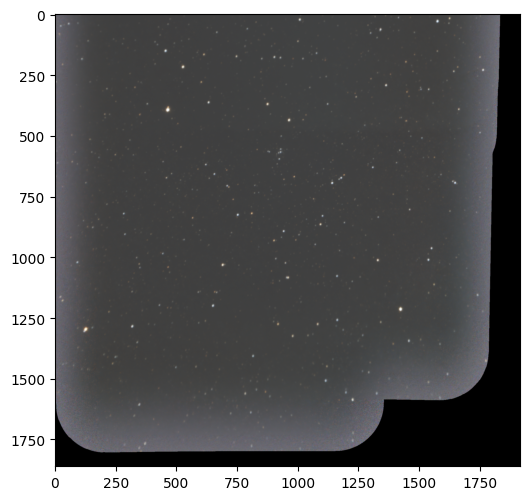

(1861, 1915, 3)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from auto_stretch import apply_stretch
import requests
from io import BytesIO

# Raw file from github.
fits_url = "https://raw.githubusercontent.com/ubsuny/PHY386/main/data/3up.fits"


response = requests.get(fits_url)
response.raise_for_status()


hdul = fits.open(BytesIO(response.content))
rgb_data = np.transpose(hdul[0].data, (1, 2, 0))
hdul.close()

top_margin = 0
bottom_margin = 0
left_margin = 0
right_margin = 0

#top_margin = 200
#bottom_margin = 550
#left_margin = 250
#right_margin = 350

cropped_rgb = rgb_data[top_margin:rgb_data.shape[0]-bottom_margin,
                       left_margin:rgb_data.shape[1]-right_margin, :]


# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(apply_stretch(cropped_rgb))

plt.show()
cropped_rgb.shape

In [5]:
import pandas as pd
import pandas as pd
from astropy.wcs import WCS
from astropy.stats import mad_std
import photutils.detection as detection
import numpy as np

bkg_sigma = mad_std(np.mean(cropped_rgb, axis = 2))

daofind = detection.DAOStarFinder(fwhm=3.0, threshold=bkg_sigma * 10, min_separation = 15)
sources = daofind(cropped_rgb[:, :,0])

catalog = sources.to_pandas().sort_values('flux', ascending=False).head(10)

catalog


,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag
241,242,125.315384,1298.061986,0.375403,-0.606649,0.396626,25,53870,1005260,-15.005696,-4.760369
71,72,463.725193,394.021992,0.426999,0.093119,0.167663,25,51860,995584,-14.995195,-4.590671
227,228,1422.506166,1214.768504,0.486563,0.166742,0.588047,25,48598,801240,-14.759407,-4.797200
37,38,526.372276,216.637583,0.452280,-0.340889,0.195442,25,20900,326494,-13.784688,-4.102504
78,79,963.123118,435.821084,0.447518,-0.450109,0.050269,25,22185,322394,-13.770967,-4.308555
203,204,689.957011,1032.254905,0.381885,-0.384880,0.357339,25,17503,286623,-13.643278,-3.914510
2,3,1574.617965,28.950195,0.422179,-0.389793,0.081294,25,16925,277613,-13.608599,-3.811285
67,68,874.553462,369.861792,0.431257,-0.320068,0.067843,25,15143,241245,-13.456146,-3.743086
140,141,1140.700416,694.836047,0.427393,-0.326790,0.055370,25,14712,224484,-13.377963,-3.802921
198,199,1328.719432,1012.864388,0.437984,-0.017771,0.295429,25,12516,207293,-13.291462,-3.429821


In [6]:
wcs = WCS(hdul[0].header)
print(wcs)

sky_coords = wcs.all_world2pix(catalog['xcentroid'], catalog['ycentroid'], 1, 1)

catalog['ra'] = sky_coords[0]
catalog['dec'] = sky_coords[1]
catalog

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN' 'DEC--TAN' '' 
CRVAL : 25.8111625882977 63.5384206931328 0.0 
CRPIX : 921.0 119.0 0.0 
PC1_1 PC1_2 PC1_3  : 0.999778549767352 0.0211508379531688 0.0 
PC2_1 PC2_2 PC2_3  : -0.0209811457152273 0.999777631225308 0.0 
PC3_1 PC3_2 PC3_3  : 0.0 0.0 1.0 
CDELT : -0.00110883666158442 0.00111216032976206 1.0 
NAXIS : 1915  1861  3


,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec
241,242,125.315384,1298.061986,0.375403,-0.606649,0.396626,25,53870,1005260,-15.005696,-4.760369,NaN,NaN
71,72,463.725193,394.021992,0.426999,0.093119,0.167663,25,51860,995584,-14.995195,-4.590671,-71664.900650,6969.070749
227,228,1422.506166,1214.768504,0.486563,0.166742,0.588047,25,48598,801240,-14.759407,-4.797200,-62431.562905,96877.245510
37,38,526.372276,216.637583,0.452280,-0.340889,0.195442,25,20900,326494,-13.784688,-4.102504,NaN,NaN
78,79,963.123118,435.821084,0.447518,-0.450109,0.050269,25,22185,322394,-13.770967,-4.308555,9894.509211,40311.060025
203,204,689.957011,1032.254905,0.381885,-0.384880,0.357339,25,17503,286623,-13.643278,-3.914510,NaN,NaN
2,3,1574.617965,28.950195,0.422179,-0.389793,0.081294,25,16925,277613,-13.608599,-3.811285,-139835.296790,75593.651781
67,68,874.553462,369.861792,0.431257,-0.320068,0.067843,25,15143,241245,-13.456146,-3.743086,NaN,NaN
140,141,1140.700416,694.836047,0.427393,-0.326790,0.055370,25,14712,224484,-13.377963,-3.802921,NaN,NaN
198,199,1328.719432,1012.864388,0.437984,-0.017771,0.295429,25,12516,207293,-13.291462,-3.429821,NaN,NaN


In [7]:
from astropy.wcs import WCS

wcs = WCS(hdul[0].header)

# Assuming the third dimension is represented by a constant value (e.g., 0)
third_dim_value = 0  # or any other relevant value for your data

world = wcs.all_pix2world(
    catalog['xcentroid'],
    catalog['ycentroid'],
    np.full(len(catalog), third_dim_value),  # Provide values for the third dimension
    1,
    ra_dec_order=True,  # ensure the output is (ra, dec)
)
catalog['ra'], catalog['dec'] = world
catalog

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec
241,242,125.315384,1298.061986,0.375403,-0.606649,0.396626,25,53870,1005260,-15.005696,-4.760369,27.821613,64.854196
71,72,463.725193,394.021992,0.426999,0.093119,0.167663,25,51860,995584,-14.995195,-4.590671,26.946785,63.850436
227,228,1422.506166,1214.768504,0.486563,0.166742,0.588047,25,48598,801240,-14.759407,-4.797200,24.448389,64.738684
37,38,526.372276,216.637583,0.452280,-0.340889,0.195442,25,20900,326494,-13.784688,-4.102504,26.791762,63.652856
78,79,963.123118,435.821084,0.447518,-0.450109,0.050269,25,22185,322394,-13.770967,-4.308555,25.688176,63.889659
203,204,689.957011,1032.254905,0.381885,-0.384880,0.357339,25,17503,286623,-13.643278,-3.914510,26.357441,64.558154
2,3,1574.617965,28.950195,0.422179,-0.389793,0.081294,25,16925,277613,-13.608599,-3.811285,24.196743,63.413939
67,68,874.553462,369.861792,0.431257,-0.320068,0.067843,25,15143,241245,-13.456146,-3.743086,25.914527,63.818402
140,141,1140.700416,694.836047,0.427393,-0.326790,0.055370,25,14712,224484,-13.377963,-3.802921,25.221148,64.172356
198,199,1328.719432,1012.864388,0.437984,-0.017771,0.295429,25,12516,207293,-13.291462,-3.429821,24.711950,64.518614


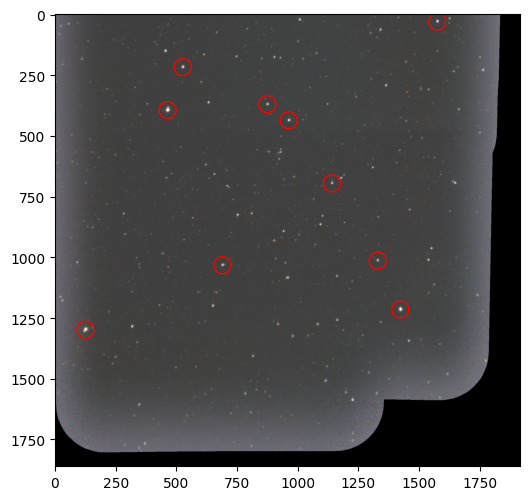

(1861, 1915, 3)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from auto_stretch import apply_stretch
import requests
from io import BytesIO

# Raw file from github.
fits_url = "https://raw.githubusercontent.com/ubsuny/PHY386/main/data/3up.fits"


response = requests.get(fits_url)
response.raise_for_status()


hdul = fits.open(BytesIO(response.content))
rgb_data = np.transpose(hdul[0].data, (1, 2, 0))
hdul.close()

top_margin = 0
bottom_margin = 0
left_margin = 0
right_margin = 0

#top_margin = 200
#bottom_margin = 550
#left_margin = 250
#right_margin = 350

cropped_rgb = rgb_data[top_margin:rgb_data.shape[0]-bottom_margin,
                       left_margin:rgb_data.shape[1]-right_margin, :]


# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(apply_stretch(cropped_rgb))

# Use square brackets to access columns in the DataFrame
plt.scatter(catalog['xcentroid'], catalog['ycentroid'], color='red', marker='o', facecolors='none', s=150, label= 'Brightest stars')

plt.show()
cropped_rgb.shape

In [9]:
from astroquery.simbad import Simbad
import astropy.units as u
from astropy.coordinates import SkyCoord
from tqdm import tqdm

options = Simbad.list_votable_fields()

In [10]:
options[options["type"] == "bundle of basic columns"][("name", "description")]

name,description
object,object
coordinates,all fields related with coordinates
dim,"major and minor axis, angle and inclination"
dimensions,all fields related to object dimensions
morphtype,all fields related to the morphological type
parallax,all fields related to parallaxes
propermotions,all fields related with the proper motions
sp,all fields related with the spectral type
velocity,all fields related with radial velocity and redshift


In [57]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.units as u
from tqdm import tqdm

Simbad.ROW_LIMIT = 1
Simbad.reset_votable_fields()
Simbad.add_votable_fields("mesdistance", "V", "sp", "otype", "ids")

for idx, row in tqdm(catalog.iterrows(), total=catalog.shape[0]):
    ra, dec = row['ra'], row['dec']
    coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
    print(coord)
    try:
        result = Simbad.query_region(coord, radius="10s")
        if result:
            catalog.at[idx, 'star_name']       = result[0]['main_id']
            catalog.at[idx, 'spectral_type']   = result[0]['sp_type']
            catalog.at[idx, 'object_type']     = result[0]['otype']
            catalog.at[idx, 'visual_mag']      = result[0]['V']

            dist = result[0]['mesdistance_distance']
            catalog.at[idx, 'simbad_distance_pc'] = float(dist) if dist is not None else None

    except Exception as e:
        print(f"Error querying SIMBAD for {idx}: {e}")

100%|██████████| 10/10 [00:00<00:00, 366.67it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (27.82161272, 64.85419559)>
Error querying SIMBAD for 241: 'mesdistance_distance'
<SkyCoord (ICRS): (ra, dec) in deg
    (26.94678498, 63.85043597)>
<SkyCoord (ICRS): (ra, dec) in deg
    (24.44838891, 64.73868444)>
Error querying SIMBAD for 227: 'mesdistance_distance'
<SkyCoord (ICRS): (ra, dec) in deg
    (26.79176233, 63.65285613)>
Error querying SIMBAD for 37: 'mesdistance_distance'
<SkyCoord (ICRS): (ra, dec) in deg
    (25.68817575, 63.8896587)>
Error querying SIMBAD for 78: 'mesdistance_distance'
<SkyCoord (ICRS): (ra, dec) in deg
    (26.3574405, 64.5581537)>
Error querying SIMBAD for 203: 'mesdistance_distance'
<SkyCoord (ICRS): (ra, dec) in deg
    (24.196743, 63.41393851)>
Error querying SIMBAD for 2: 'mesdistance_distance'
<SkyCoord (ICRS): (ra, dec) in deg
    (25.91452714, 63.81840184)>
<SkyCoord (ICRS): (ra, dec) in deg
    (25.22114774, 64.1723564)>
Error querying SIMBAD for 140: 'mesdistance_distance'
<SkyCoord (ICRS): (ra, dec) i

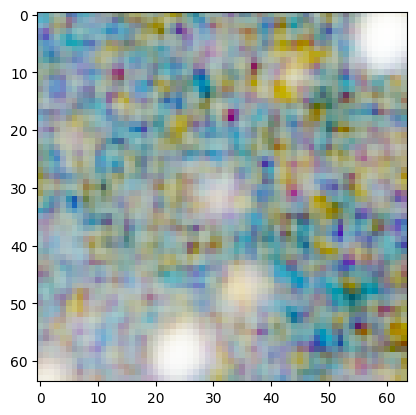

In [48]:
import matplotlib.pyplot as plt

def make_patch(image, x,y, size = 64):
  x_min = int(np.clip(x-size/2, 0, image.shape[0]))
  x_max = int(np.clip(x+size/2, 0, image.shape[0]))
  y_min = int(np.clip(y-size/2, 0, image.shape[1]))
  y_max = int(np.clip(y+size/2, 0, image.shape[1]))
  return image[x_min:x_max, y_min:y_max]

# Access the first row using iloc
plt.imshow(apply_stretch(make_patch(cropped_rgb, catalog['xcentroid'].iloc[0], catalog['ycentroid'].iloc[0])),cmap='gray')
plt.show()

In [59]:
from re import M
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 4

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
catalog['spectral_type'].unique()

array(['K4Ib-IIa', nan, 'A6Ia', 'G5III', 'K0', 'K2', 'B8III', 'O9.7II',
       'B5'], dtype=object)

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

def extract_spectral_class(s):
  """simply spectral class, e.g. M1 -> M"""
  if isinstance(s, str) and len(s) > 0:  # Check if the value is a non-empty string
    return s[0]
  else:
    return np.nan  # Return NaN if not a string or empty

catalog['simple_spectral_class'] = catalog['spectral_type'].apply(extract_spectral_class)
catalog.head()

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec,star_name,spectral_type,object_type,visual_mag,simbad_distance_pc,simple_spectral_class,spectral_label
241,242,125.315384,1298.061986,0.375403,-0.606649,0.396626,25,53870,1005260,-15.005696,-4.760369,27.821613,64.854196,HD 11092,K4Ib-IIa,*,6.570,NaN,K,3
71,72,463.725193,394.021992,0.426999,0.093119,0.167663,25,51860,995584,-14.995195,-4.590671,26.946785,63.850436,NaN,NaN,NaN,NaN,NaN,NaN,5
227,228,1422.506166,1214.768504,0.486563,0.166742,0.588047,25,48598,801240,-14.759407,-4.797200,24.448389,64.738684,HD 9811,A6Ia,*,6.528,NaN,A,0
37,38,526.372276,216.637583,0.452280,-0.340889,0.195442,25,20900,326494,-13.784688,-4.102504,26.791762,63.652856,HD 10755,G5III,*,7.750,NaN,G,2
78,79,963.123118,435.821084,0.447518,-0.450109,0.050269,25,22185,322394,-13.770967,-4.308555,25.688176,63.889659,HD 10304,K0,PM*,7.870,NaN,K,3


In [62]:
le = LabelEncoder()
catalog['spectral_label'] = le.fit_transform(catalog['simple_spectral_class'])
catalog.head()

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec,star_name,spectral_type,object_type,visual_mag,simbad_distance_pc,simple_spectral_class,spectral_label
241,242,125.315384,1298.061986,0.375403,-0.606649,0.396626,25,53870,1005260,-15.005696,-4.760369,27.821613,64.854196,HD 11092,K4Ib-IIa,*,6.570,NaN,K,3
71,72,463.725193,394.021992,0.426999,0.093119,0.167663,25,51860,995584,-14.995195,-4.590671,26.946785,63.850436,NaN,NaN,NaN,NaN,NaN,NaN,5
227,228,1422.506166,1214.768504,0.486563,0.166742,0.588047,25,48598,801240,-14.759407,-4.797200,24.448389,64.738684,HD 9811,A6Ia,*,6.528,NaN,A,0
37,38,526.372276,216.637583,0.452280,-0.340889,0.195442,25,20900,326494,-13.784688,-4.102504,26.791762,63.652856,HD 10755,G5III,*,7.750,NaN,G,2
78,79,963.123118,435.821084,0.447518,-0.450109,0.050269,25,22185,322394,-13.770967,-4.308555,25.688176,63.889659,HD 10304,K0,PM*,7.870,NaN,K,3


In [63]:
patches = []
for _, row in catalog.iterrows():
  patch = make_patch(cropped_rgb, row['xcentroid'], row['ycentroid'])
  # Ensure all patches have the same shape by resizing or padding
  patch = patch[:64, :64, :]  # Adjust if your desired shape is different
  # Pad if patch is smaller than 64x64
  if patch.shape[0] < 64 or patch.shape[1] < 64:
    pad_height = 64 - patch.shape[0]
    pad_width = 64 - patch.shape[1]
    patch = np.pad(patch, ((0, pad_height), (0, pad_width), (0, 0)), 'constant')
  patches.append(patch)

x = np.array(patches)[..., np.newaxis]
y = catalog['spectral_label'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)